In [0]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [0]:
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
import numpy as np
import matplotlib.pyplot as plt
import os
import gym
import random
import copy
import math
from sklearn import preprocessing
import gym
from keras import models
from keras import layers
from keras.optimizers import Adam
from collections import deque
import random
import numpy as np
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense, Lambda, Add, Conv2D, Flatten
from keras.optimizers import Adam, RMSprop
from keras import backend as K
# from PER import *
import cv2

In [40]:
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1005'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1005'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
# %matplotlib inline

# # This code creates a virtual display to draw game images on. 
# # If you are running locally, just ignore it

# if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
#     !bash ../xvfb start
#     print(1)
#     %env DISPLAY=:1

# PART(A)

## NOTE CAN ONLY LOAD ONE ENVIRONMENT AT A TIME

### Pong env

Observation space: Box(210, 160, 3)
Action space: Discrete(6)
(210, 160, 3)


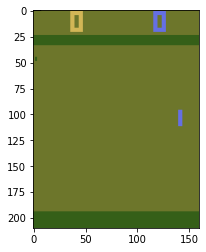

In [41]:
ping_env = gym.make("Pong-v0")

obs = ping_env.reset()
plt.imshow(ping_env.render('rgb_array'))
print("Observation space:", ping_env.observation_space)
print("Action space:", ping_env.action_space)
print(obs.shape)

In [42]:
isDone = False
curr = ping_env.reset()
print("start state:",curr)
tot_rew = 0
while not isDone:   
    nexts,rew,isDone,_ = ping_env.step(env.action_space.sample())
    print("next_stae:",nexts,"reward:",rew)
    curr = nexts
    tot_rew +=rew
print("total_reward:",tot_rew)

Streaming output truncated to the last 5000 lines.
next_stae: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]] reward: 0.0
next_stae: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144 

image is represented as shape ( 210,160,3) , 6 actions are possible. lasts till 10,000 time steps max before losing or winning. Reward is -1 if lost and 0 if nothing happens and 1 if won.


### Mountain car env

Observation space: Box(2,)
Action space: Discrete(3)


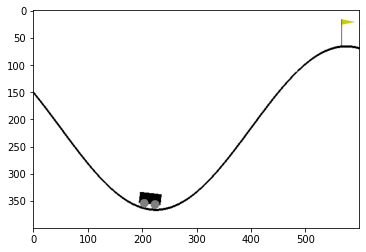

In [4]:
%matplotlib inline
env = gym.make("MountainCar-v0")
obs = env.reset()
plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)


In [5]:
isDone = False
curr = env.reset()
print("start state:",curr)
tot_rew = 0
while not isDone:   
    nexts,rew,isDone,_ = env.step(env.action_space.sample())
    print("next_stae:",nexts,"reward:",rew)
    curr = nexts
    tot_rew +=rew
print("total_reward:",tot_rew)

start state: [-0.54576733  0.        ]
next_stae: [-5.45601193e-01  1.66141655e-04] reward: -1.0
next_stae: [-0.54427015  0.00133104] reward: -1.0
next_stae: [-0.54278418  0.00148598] reward: -1.0
next_stae: [-0.54115439  0.00162979] reward: -1.0
next_stae: [-0.538393    0.00276139] reward: -1.0
next_stae: [-0.53552068  0.00287231] reward: -1.0
next_stae: [-0.53355897  0.00196171] reward: -1.0
next_stae: [-0.53252258  0.0010364 ] reward: -1.0
next_stae: [-5.32419256e-01  1.03319641e-04] reward: -1.0
next_stae: [-0.53124979  0.00116947] reward: -1.0
next_stae: [-0.52902295  0.00222684] reward: -1.0
next_stae: [-0.52675542  0.00226752] reward: -1.0
next_stae: [-0.52446423  0.0022912 ] reward: -1.0
next_stae: [-0.52116654  0.00329769] reward: -1.0
next_stae: [-0.51888709  0.00227945] reward: -1.0
next_stae: [-0.51764298  0.00124411] reward: -1.0
next_stae: [-5.17443539e-01  1.99443853e-04] reward: -1.0
next_stae: [-0.51829026 -0.00084672] reward: -1.0
next_stae: [-0.52017679 -0.00188653] 

In this environment the reward is -1 for moving forward climbing right hill 0 reward. the state is reresented as position(x), velocity

In [0]:
from collections import deque

class ReplayBuffer:
    """
        Class that represents the Replay Buffer used by the Learning Agent. It uses Dequeue data structure to store the quadruples
        The buffer size is set according to the parameters passed. This Buffer is used to randomly sample the quadruples/experiences
        and returns these samples with size of batch_size
    """
    def __init__(self,batchSize,buffer_size):
        self.buffer = []
        self.batch_size = batchSize
        self.memory = deque(maxlen = buffer_size)
        
    def storeExp(self,exp):
        #self.buffer.append(exp)
        self.memory.append(exp)
    def getBatchExp(self):
        experiences = random.sample(self.memory,k = self.batch_size)
        return experiences
    def __len__(self):
        return len(self.memory)

#### Used to preprocess the Image frame used only for pong environment

In [0]:
class Preprocessor:
    """
        This class implemets the preprocessing of the frames of the environment
    """
    def __init__(self):
        self.prev_frames = np.zeros(shape=(4,60,60),dtype = int)
        #self.frame_shape = frame_shape

    def preprocess(self,curr_frame):
        """
            4 frames are stored as a single state representation. The oldest frame is removed and the newest frame is added like in a dequeue manner.
        """
        cropped_frame = curr_frame[35:195,:,:]  ## cropping the required frame
        gray_frame = cv2.cvtColor(cropped_frame, cv2.COLOR_RGB2GRAY)  ## converting it to grayscale
        resized_frame = cv2.resize(gray_frame, (60,60), interpolation = cv2.INTER_CUBIC)  ## downsampling
        new_frame = np.array(resized_frame).astype(np.float32) / 255.0   ## converting the range of values to 0-1
        self.prev_frames = np.roll(self.prev_frames,-1,axis = 0)   ## shifting the 4 frames stored
        self.prev_frames[3] = new_frame ## storing the new frame at last position
        return self.prev_frames

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13134713897055202017
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11364381754667926244
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11976522511891875738
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15701463552
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13187629130676381533
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [0]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


# PART(B)

In [0]:

### Uncomment the code to run it on GPU ###
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 1} ) 
sess = tf.compat.v1.Session(config=config) 
tf.compat.v1.keras.backend.set_session(sess)



class DQN:
    """
        This class represents the Learning Agent that learns the given environment using the DQN or Double DQN algorithm based on the hyperparameters
        passed. The Q Function is represented by the Neural Network. 
    """
    def createNetwork(self,isCNN_req = False):
        """
            This method is used to create the network. Keras Framework is used to create the neural network model. Mse Loss is used as loss function 
            with ADAM optimizer. The learning rate is set to 0.001 
        """
        if not isCNN_req:
            model = models.Sequential()
            state_shape = self.env.observation_space.shape
            model.add(layers.Dense(24, activation='relu', input_shape=state_shape))
            model.add(layers.Dense(48, activation='relu'))
            model.add(layers.Dense(self.env.action_space.n,activation='linear'))
            model.compile(loss='mse', optimizer=Adam(lr=0.001))
            return model

        else:
            """
                This network is used when images are to be processed
            """
            model = models.Sequential()
            input_shape= (4,60,60)
            model.add(Conv2D(32, kernel_size=8,strides = (4,4),padding = "valid", activation='relu', input_shape=input_shape,data_format = "channels_first"))
            model.add(Conv2D(16, kernel_size=4,strides = (2,2),padding = "valid", activation='relu',data_format = "channels_first"))
            model.add(Conv2D(8, kernel_size=3,strides = (2,2),padding = "valid", activation='relu',data_format = "channels_first"))
            model.add(Flatten())
            model.add(Dense(512, activation='relu'))
            model.add(Dense(256,activation = 'relu'))
            model.add(Dense(64,activation = 'relu'))
            model.add(Dense(self.env.action_space.n,activation = 'linear'))
            model.compile(optimizer=Adam(lr=0.00025), loss='mse')
            return model

    def __init__(self,episodes,buffer_size,batch_size,timeStep,env,C, epsilon,gamma,eps_min,log_int,isDDQN_learning = False,img_preprocessor = None):
        """ 
            Initialize the DQN algorithm with the given parameters
        """
        self.E = episodes                   ## Total number of episodes the algorithm is run 
        self.batch_size = batch_size        ## The batch size represents the Random sample size
        self.D = buffer_size                ## The buffer size is the size of the replay buffer
        self.T = timeStep                   ## The time step for each episode
        self.env = env                      
        self.isDDQN_learning = isDDQN_learning          ## Wether to run the Double DQN algorithm or not
        if img_preprocessor is None:
            self.QactionNetwork = self.createNetwork()      
            self.QtargetNetwork = self.createNetwork()      ## Target Network
        else:
            self.QactionNetwork = self.createNetwork(True)
            self.QtargetNetwork = self.createNetwork(True)
        self.QtargetNetwork.set_weights(self.QactionNetwork.get_weights())      ## Initializing both networks with same weights
        self.experienceBuffer = ReplayBuffer(self.batch_size,self.D)    
        self.Preprocessor = img_preprocessor
        self.epsilon = epsilon              ## Epsilon value used by the Epsilon greedy algorithm 
        self.init_eps = self.epsilon        ## Initial epsilon value
        self.epsilon_min = eps_min          ## Terminal epsilon value
        self.gamma = gamma          
        self.logging_interval = log_int     ## Period of episodes the score is stored for
        self.C = C                          ## Period of episode after which the Two networks are synced
        ## To store the scores
        self.score_rec = []
        self.eps_rec = []

    def epsilon_greedy(self,state):
        """
            Epsilon greedy function. Initially the epsilon value is set to 1 and then it is decayed after each episode by some factor.
            Finally the value decays to 0.01
        """
        if self.Preprocessor is not None:
            state = state.reshape(1,4,60,60)
        else :
            state = state.reshape(1,2)
        if np.random.rand(1) < self.epsilon:
            action = np.random.randint(0, 3)
        else:
            action=np.argmax(self.QactionNetwork.predict(state)[0])

        return action
            
    def processBatch(self,batch):
        ## convert the batch to numpy arrays of states,next_states
        if self.Preprocessor is None:
            state = (np.vstack([e[0] for e in batch if e is not None ]))
            next_state = (np.vstack([e[3] for e in batch if e is not None]))
        
        else:
            state = np.array([e[0] for e in batch if e is not None]).reshape(-1,4,60,60)
            next_state = np.array([e[3] for e in batch if e is not None ]).reshape(-1,4,60,60)
            #print(state.shape,next_state.shape,batch[0][0].shape)
        
        reward = (np.vstack([e[2] for e in batch if e is not None]))
        action = (np.vstack([e[1] for e in batch if e is not None]))
        isDone = np.vstack([int(e[4]) for e in batch if e is not None])

        return state,action,reward,next_state,isDone

    def soft_update(self, local_model, target_model, tau):
        """
            To do soft update of the parameters of the Qnetwork theta_target = tau*theta_local + (1 - tau)*theta_target
        
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

    def replay(self):
        """
            This method is used by the DQN learning agent to do random sampling from the replay buffer and then perform.
            Gradient update according to the DQN or Double DQN algorithm. This method is performed only when enough experiences
            are present in the Replay Buffer.
        """

        if len(self.experienceBuffer) >= self.batch_size:
            
            sample_batch_exps = self.experienceBuffer.getBatchExp()
            state,action,reward,nexts,isDone = self.processBatch(sample_batch_exps)
            #print(state.shape,nexts.shape)
            ## If Vanilla DQN learning is not used
            if not self.isDDQN_learning : 
                
                predicted = self.QactionNetwork.predict(state)
                next_state_targets = (np.max(self.QtargetNetwork.predict(nexts),axis = 1)).reshape(-1,1)
                targets = reward + (self.gamma * (next_state_targets * (1 - isDone)))
                action = action.reshape(-1,)
                for i in range(len(targets)):
                    predicted[i,action[i]] = targets[i][0]
                self.QactionNetwork.fit(state,predicted,epochs = 1,verbose = 0)
            
            ## If Double DQN learning is used
            else :
                
                argMaxActionNextState = (np.argmax(self.QtargetNetwork.predict(nexts),axis = 1)).reshape(-1,)
                temparr = [x for x in range(len(state))]
                double_target = self.QactionNetwork.predict(nexts)[temparr,argMaxActionNextState]
                double_target = double_target.reshape(-1,1)
                targets = reward + (self.gamma * (double_target * (1 - isDone)))
                predicted = self.QactionNetwork.predict(state)
                for i in range(len(targets)):
                    predicted[i,action[i]] = targets[i][0]
                self.QactionNetwork.fit(state,predicted,epochs=1,verbose = 0)


    def learn(self):
        """
            Method used by the learning agent to learn the environment using DQN or Double DQN algorithm. It learns the episode by running T number of steps
            for each E number of Episode of the given Environment.
        """
        
        tot = 0
        print("Training the dqn network ...")
        ## Iterating over E number of episodes
        for eps in range(1,self.E+1):
            if eps%100 == 0:
                print("training the dqn network with eps:",eps,"finished ...")
            curr_state = self.env.reset()    ## resetting the environment
            if self.Preprocessor != None:
                curr_state = self.Preprocessor.preprocess(curr_state)   ## doing preprocessing if required
                #print(curr_state.shape)
            score = 0     ## To store the score in the current episode
            max_pos = -100  ## To store the max position attained in the current episode
            for time_step in range(1,self.T+1):
                action = self.epsilon_greedy( curr_state )
                next_state,reward,isDones,_ = self.env.step(action)
                ## If final state is reached then reward is set to 10 instead of 1.
                if self.Preprocessor == None and next_state[0] >= 0.5:
                    reward = 10

                score += -1
                if self.Preprocessor == None and next_state[0] > max_pos:
                    max_pos = next_state[0]
                
                if self.Preprocessor != None:
                    next_state = self.Preprocessor.preprocess(next_state)
                ## Store the experience
                
                self.experienceBuffer.storeExp((curr_state,action,reward,next_state,isDones))
                ## Perform gradient updates
                self.replay()
                curr_state = next_state
                if isDones:
                    break
            
            ## SYNC THE two networks
            if eps%self.C == 0:
                self.QtargetNetwork.set_weights(self.QactionNetwork.get_weights())                
            ## DECAY THE epsilon to reduce exploration 
            self.epsilon = max(self.epsilon_min,self.epsilon - 0.05)
            ## LOG the score
            if eps%self.logging_interval == 0:
                self.eps_rec.append(eps)
                self.score_rec.append(score)
            if eps %50 ==0:
                print("episode",eps,"score in this episode:",score)#"Max position reached:",max_pos)

## For Pong Env

In [0]:
score_logging_interval = 5   ## logging is done every after episode finishes
episode_total = 600           ## Total number of episodes to run
buffer_size = 20000           ## Replay buffer size
batch_size = 200              ## Random sample batch size
max_time_steps = 20000         ## Time step to run each episode before final state is reached
sync_per = 2                  ## Syncing period of two Q networks . The period is in number of episodes
start_epsilon = 1              
terminal_epsilon = 0.01
gamma = 0.99
isDDQN_learning = False
preprocessor = Preprocessor()
dqn = DQN(episode_total,buffer_size,batch_size,max_time_steps,ping_env,sync_per,start_epsilon,gamma,terminal_epsilon,score_logging_interval,isDDQN_learning,preprocessor)
''' There might be issues with tensorflow version when running keras  faced multiple times when running a particular runtime''' 


## Training takes lot of time. So learning curve not able to plot due to limited resources.

In [0]:
dqn.learn()

Training the dqn network ...


## For Mountain_Car env takes about 1 hr

In [0]:
""" Used for setting seed since keras uses tensorflow as backedn """
import tensorflow as tf
seed_value = 10
tf.compat.v1.set_random_seed(seed_value)
# for previous versions:
# tf.random.set_seed(seed_value) 


In [0]:
score_logging_interval = 5   ## logging is done every after episode finishes
episode_total = 600           ## Total number of episodes to run
buffer_size = 20000           ## Replay buffer size
batch_size = 200              ## Random sample batch size
max_time_steps = 200          ## Time step to run each episode before final state is reached
sync_per = 1                  ## Syncing period of two Q networks . The period is in number of episodes
start_epsilon = 1              
terminal_epsilon = 0.01
gamma = 0.99

dqn = DQN(episode_total,buffer_size,batch_size,max_time_steps,env,sync_per,start_epsilon,gamma,terminal_epsilon,score_logging_interval)


Training the dqn network ...
episode 50 score in this episode: -192
training the dqn network with eps: 100 finished ...
episode 100 score in this episode: -200
episode 150 score in this episode: -200
training the dqn network with eps: 200 finished ...
episode 200 score in this episode: -95
episode 250 score in this episode: -117
training the dqn network with eps: 300 finished ...
episode 300 score in this episode: -142
episode 350 score in this episode: -105
training the dqn network with eps: 400 finished ...
episode 400 score in this episode: -92
episode 450 score in this episode: -113
training the dqn network with eps: 500 finished ...
episode 500 score in this episode: -115
episode 550 score in this episode: -117
training the dqn network with eps: 600 finished ...
episode 600 score in this episode: -161


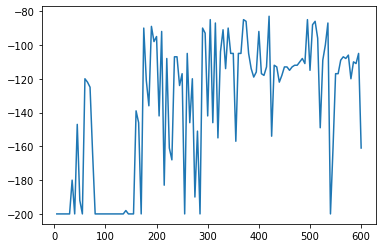

In [17]:
dqn.learn()
plt.plot(dqn.eps_rec,dqn.score_rec)
plt.show()

* The learning curve graph is shown above. For several runs in intial 100 to 200 episodes the agent is not able to sucessfully move to the flag
 The scores are averaged over 5 episodes. This graph proves that the agent was able to learn the environment giving score more than -100 at the end. At initial 100 episodes it failed every single time.

### FOR testing the environment after the agent is trained only for Mountain Car environment

In [0]:
def test(dqn):
    avg_score = 0
    for t in range(100):
        env = gym.make("MountainCar-v0")
        curr_state = env.reset()
        isDone = False
        steps = 0
        tot_rew = 0
        for jj in range(200):
            #print(curr_state)
            action = np.argmax(dqn.QactionNetwork.predict(curr_state.reshape(1,2)))
            
            if random.random() < 0.01:
                action = random.randint(0,2)
            next_state,rew,isDone,_ = env.step(action)
            steps+=1
            curr_state = next_state
            tot_rew+=rew
            if isDone:
                break
        #print("Steps taken:",steps,"reward:",tot_rew)
        avg_score +=tot_rew
    print('avg_score:',avg_score/100)



* Dqn has average of -130 to -120 score

In [0]:
test(dqn)

### Double DQN 

Training the dqn network ...
episode 50 score in this episode: -200
training the dqn network with eps: 100 finished ...
episode 100 score in this episode: -200
episode 150 score in this episode: -200
training the dqn network with eps: 200 finished ...
episode 200 score in this episode: -200
episode 250 score in this episode: -200
training the dqn network with eps: 300 finished ...
episode 300 score in this episode: -200
episode 350 score in this episode: -200
training the dqn network with eps: 400 finished ...
episode 400 score in this episode: -182
episode 450 score in this episode: -167
training the dqn network with eps: 500 finished ...
episode 500 score in this episode: -87
episode 550 score in this episode: -200
training the dqn network with eps: 600 finished ...
episode 600 score in this episode: -116


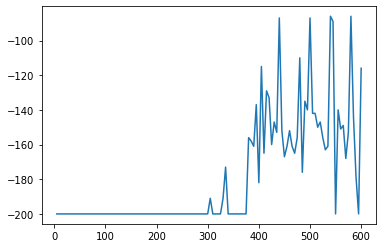

In [33]:
score_logging_interval = 5   ## logging is done every after episode finishes
episode_total = 600
buffer_size = 20000
batch_size = 200
max_time_steps = 200
sync_per = 1
start_epsilon = 1
terminal_epsilon = 0.01
gamma = 0.99
ddqn_learning = True
ddqn = DQN(episode_total,buffer_size,batch_size,max_time_steps,env,sync_per,start_epsilon,gamma,terminal_epsilon,score_logging_interval,ddqn_learning)
ddqn.learn()
plt.plot(ddqn.eps_rec,ddqn.score_rec)
plt.show()


In [36]:
test(ddqn)

avg_score: -122.89


## Visualization of action given state and velocity only for mountain cart env


In [0]:
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
def visualize(dqn):
    X = np.random.uniform(-1.2, 0.6, 10000)
    Y = np.random.uniform(-0.07, 0.07, 10000)
    Z = []
    for i in range(len(X)):
        temp =  np.argmax(dqn.QactionNetwork.predict(np.array([X[i],Y[i]]).reshape(1,2) )).reshape(-1,) # torch.max(policy(Variable(torch.from_numpy(np.array([X[i],Y[i]]))).type(torch.FloatTensor)), dim =-1)
        #z = temp.item()
        Z.append(temp[0])
    Z = pd.Series(Z)
    colors = {0:'blue',1:'lime',2:'red'}
    colors = Z.apply(lambda x:colors[x])
    labels = ['Left','Right','Nothing']
    fig = plt.figure(5, figsize=[7,7])
    ax = fig.gca()
    plt.set_cmap('brg')
    surf = ax.scatter(X,Y, c=Z)
    ax.set_xlabel('Position')
    ax.set_ylabel('Velocity')
    ax.set_title('Policy')
    recs = []
    for i in range(0,3):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=sorted(colors.unique())[i]))
    plt.legend(recs,labels,loc=4,ncol=3)
    fig.savefig('Policy - Modified.png')
    plt.show()

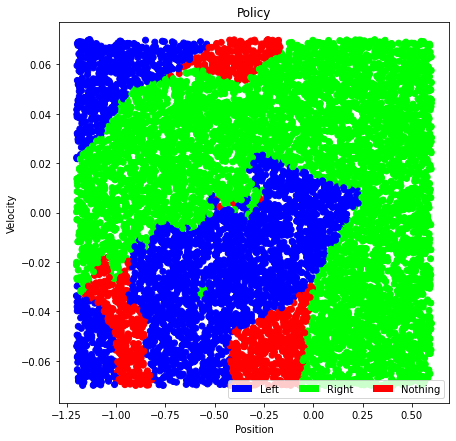

In [22]:
visualize(dqn)

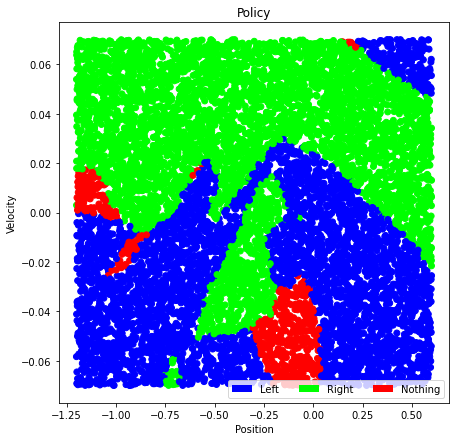

In [38]:
visualize(ddqn)

* For DDqn the visualization is different and also for several runs the ddqn had better score than the dqn algorithm when tested for 100 runs and averaging after completion of training. 

## SAVING MODEL

In [0]:
# from keras.models import model_from_json
# from keras.models import load_model

# # serialize model to JSON
# #  the keras model which is trained is defined as 'model' in this example
# model_json = dqn.QactionNetwork.to_json()


# with open("model_num.json", "w") as json_file:
#     json_file.write(model_json)

# # serialize weights to HDF5
# dqn.QactionNetwork.save_weights("model_num.h5")

#### LOADING MODEL

In [0]:
# json_file = open('model_num.json', 'r')

# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

# # load weights into new model
# loaded_model.load_weights("model_num.h5")
# print("Loaded model from disk")

# loaded_model.save('model_num.hdf5')
# loaded_model=load_model('model_num.hdf5')
# dqn.QactionNetwork = loaded_model

# Part (C)
### Hyperparameter chosen is batch size and the syncing period (period is in number of episodes)

## 32 batch size


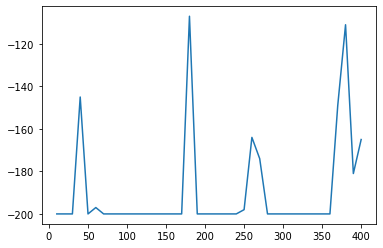

In [0]:
plt.plot(dqn.eps_rec,dqn.score_rec)
plt.show()

## 64 batch size


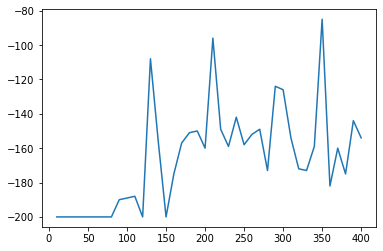

In [0]:
plt.plot(dqn.eps_rec,dqn.score_rec)
plt.show()

## 200 batch size

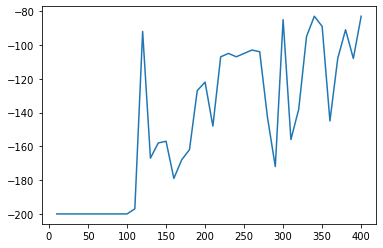

In [0]:
plt.plot(dqn.eps_rec,dqn.score_rec)
plt.show()

## 1000 batch size

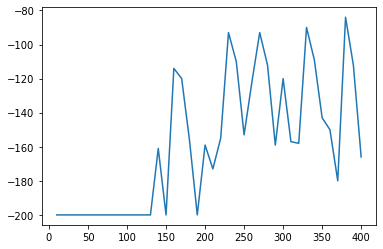

In [0]:
plt.plot(dqn.eps_rec,dqn.score_rec)
plt.show()

## Observations

* The batch size of 200 was found to be optimal. Giving average score of greater than -90 at the end of the training.

* The batch size of 32 performed the least. The learning curve was almost flat for most episodes continaing few spikes.

* For batch size of 64 the learning curve was better than that for the batch size of 32. But the final score attained at the end of the training was less than -100.

* For batch size of 1000 the performance was not that good. The agent was gaining as well as dropping in performance over several episodes (the zig zag pattern). Meaning the batch might have contained more number of correlated samples.

## SYNC 2

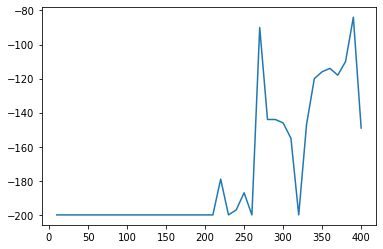

In [0]:
plt.plot(dqn.eps_rec,dqn.score_rec)
plt.show()

## SYNC 5 

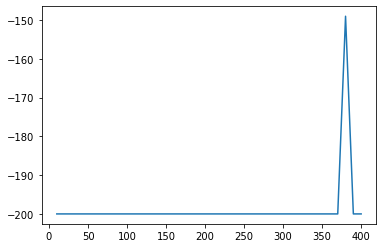

In [0]:
plt.plot(dqn.eps_rec,dqn.score_rec)
plt.show()

## Observation

* When the sync period is set to every 1 episode the performance was optimal the earlier graphs that were generated were using sync set to every 1 episode.

* When the sync was set to 2 per episode. In the initial 200 episodes the agent was not able to perform at all failing at all tasks. But after that also the performance was not better. There were drops in performances.

* When the sync was set to every 5 episode. The agent was not able to learn at all poperly. 

# PART (D)

DDQN

In [0]:
score_logging_interval = 5   ## logging is done every after episode finishes
episode_total = 600
buffer_size = 20000
batch_size = 200
max_time_steps = 200
sync_per = 1
start_epsilon = 1
terminal_epsilon = 0.01
gamma = 0.99
ddqn_learning = True
ddqn = DQN(episode_total,buffer_size,batch_size,max_time_steps,env,sync_per,start_epsilon,gamma,terminal_epsilon,score_logging_interval,ddqn_learning)
dqn = DQN(episode_total,buffer_size,batch_size,max_time_steps,env,sync_per,start_epsilon,gamma,terminal_epsilon,score_logging_interval)

#dqn.prefillBuffer()
print(len(dqn.experienceBuffer))




## DDQN Plot

Training the dqn network ...
training the dqn network with eps: 100 finished ...
training the dqn network with eps: 200 finished ...
training the dqn network with eps: 300 finished ...
training the dqn network with eps: 400 finished ...


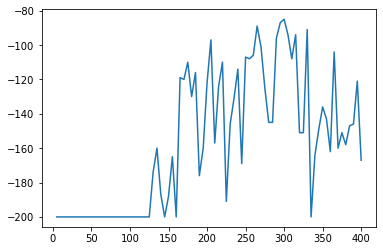

In [0]:
ddqn.learn()
plt.plot(ddqn.eps_rec,ddqn.score_rec)
plt.show()

### DQN Plot

Training the dqn network ...
training the dqn network with eps: 100 finished ...
training the dqn network with eps: 200 finished ...
training the dqn network with eps: 300 finished ...
training the dqn network with eps: 400 finished ...


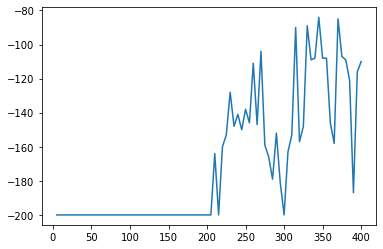

In [0]:
dqn.learn()
plt.plot(dqn.eps_rec,dqn.score_rec)
plt.show()

The ddqn algorithm was able to start learning earlier than the dqn algorithm. There was not much performance difference between the two for the mountain car environment for several runs.